In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected = True)
from tqdm import tqdm
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import pymysql
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 600)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

data 
기간 : 2018년 1월 1일 ~ 2021년 6월 30일 <br>
데이터셋 생성조건 : 거래대금 1조, 거래일자 10일, 다음날 변화률 : 0.02 이상
# 데이터셋 생성

In [63]:
def make_data(trading, days, target): 
    # 코드 리스트 
   
    IF=open("../data/code_list.txt", 'r')
    lst_code = IF.readlines()
    

    lst_dataX = []
    lst_dataY = []
    lst_data = []
    lst_target = []
    
    # database
    con = pymysql.connect(
    )

    cursor = con.cursor()
 
    for line in tqdm(lst_code): 
        code = line.strip()
        sql_query = '''
                    SELECT *
                    FROM stock_{}
                    WHERE Date
                    BETWEEN '2018-01-01' AND '2021-06-30'
                    '''.format(code)
        stock = pd.read_sql(sql = sql_query, con = con)
        lst_stock = stock.values.tolist()  


        for i, row in enumerate(lst_stock): 
            date, close, volume = row[0].strftime('%Y%m%d'), row[4], row[5]
            # 거래대금, 이동평균선 범위 조건
            if (close * volume >= trading) :
                if i < (days-1):   # 예외 처리 
                    continue                               

                lst_result = []
                
                Ddays_date = lst_stock[i-(days-1):i+1]
                                           
                for row2 in Ddays_date:
                    Open,High,Low,Close,Volume = row2[1:6]
                    Trading = Close * Volume
                    lst_result += [Open,High,Low,Close,Trading]

                rate = float(row[6])
                y = int(row[6] >= target)
                data = ','.join(map(str,lst_result))
                
                lst_dataX.append(data)
                lst_dataY.append(y)
                lst_data.append([code,date,data,y])
                lst_target.append(rate)
    return np.array(lst_dataX), np.array(lst_dataY),pd.DataFrame(lst_data),np.array(lst_target)

In [3]:
dataX, dataY, data , target = make_data(1000000000000,10,0.02)

100%|██████████████████████████████████████████████████████████████████████████████| 1561/1561 [01:27<00:00, 17.90it/s]


In [12]:
data.columns = ['code','date','trading','label']

In [13]:
code2date = data[['code','date']]

In [15]:
lst = []
for line in data['trading']:
    lst.append(list(map(int, str(line).split(','))))

In [64]:
lst_columns = []
for i in range(9,-1,-1):
    for val in ['Open','High','Low','Close','trading_val']:
        lst_columns.append(f'{val}_D-{i}')

In [66]:
df2 = pd.DataFrame(lst, columns = lst_columns)
df2.head()

,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0
0,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550,12500,15450,12450,14050,886535779600,14350,15300,13900,14350,333578205800,14450,14800,13550,13550,148350291550,13600,15400,13600,14050,451780054200,14600,18250,14550,18250,2343685750250
1,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550,12500,15450,12450,14050,886535779600,14350,15300,13900,14350,333578205800,14450,14800,13550,13550,148350291550,13600,15400,13600,14050,451780054200,14600,18250,14550,18250,2343685750250,18500,21350,17500,18000,1963299564000
2,36379,40437,35662,38146,144505974164,38622,40102,38431,39864,62342791368,40437,40819,38670,40342,51753783592,40675,51560,40532,50320,271549816880,50988,51751,47646,50224,131053601568,51560,53852,47837,52134,167995611054,50606,52706,49746,51561,78144871941,52038,61682,51465,59391,394185728439,41630,47311,41630,41631,365547656460,38002,46595,33371,41726,1406528840666
3,58600,62900,34850,34850,808041161000,32900,33350,24800,29150,946589524100,28350,32450,27300,30200,686763371800,30550,30600,27100,27650,253417088750,27000,31000,25550,28250,547098427000,28350,28700,26300,26750,122904640500,26600,27300,25600,26150,96068510200,25750,30350,25050,26800,526937097600,27200,29900,26350,29700,282149346600,30900,35500,30250,34350,1016523775050
4,6650,7460,4460,4460,814557121960,4430,4835,3800,4290,760794181290,4370,4480,3935,4040,275440441080,4090,4210,3865,4040,135435994440,4265,4350,3935,4065,157481555250,4130,4135,3970,4030,69359479670,4010,4080,3850,3955,71513669290,3860,4025,3680,3915,100265976630,3800,4160,3730,4160,184787828160,4080,5190,3980,5190,1368703369410


In [67]:
df_Y = pd.DataFrame(dataY, columns = ['Y'])
df_target = pd.DataFrame(target, columns = ['target'])

In [68]:
df = pd.concat([code2date, df2,df_target], axis = 1)
df.head()

,code,date,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0,target
0,050120,20180126,13700,16100,13400,15400,897154258000,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550,12500,15450,12450,14050,886535779600,14350,15300,13900,14350,333578205800,14450,14800,13550,13550,148350291550,13600,15400,13600,14050,451780054200,14600,18250,14550,18250,2343685750250,0.298932
1,050120,20180129,14700,15500,14000,14350,277027065700,13050,13300,11650,11650,231873876050,12200,13150,11600,12200,222393934200,12200,13750,12100,12350,256196958550,12500,15450,12450,14050,886535779600,14350,15300,13900,14350,333578205800,14450,14800,13550,13550,148350291550,13600,15400,13600,14050,451780054200,14600,18250,14550,18250,2343685750250,18500,21350,17500,18000,1963299564000,-0.013699
2,007390,20180320,36379,40437,35662,38146,144505974164,38622,40102,38431,39864,62342791368,40437,40819,38670,40342,51753783592,40675,51560,40532,50320,271549816880,50988,51751,47646,50224,131053601568,51560,53852,47837,52134,167995611054,50606,52706,49746,51561,78144871941,52038,61682,51465,59391,394185728439,41630,47311,41630,41631,365547656460,38002,46595,33371,41726,1406528840666,0.002282
3,950130,20200903,58600,62900,34850,34850,808041161000,32900,33350,24800,29150,946589524100,28350,32450,27300,30200,686763371800,30550,30600,27100,27650,253417088750,27000,31000,25550,28250,547098427000,28350,28700,26300,26750,122904640500,26600,27300,25600,26150,96068510200,25750,30350,25050,26800,526937097600,27200,29900,26350,29700,282149346600,30900,35500,30250,34350,1016523775050,0.156566
4,042040,20201014,6650,7460,4460,4460,814557121960,4430,4835,3800,4290,760794181290,4370,4480,3935,4040,275440441080,4090,4210,3865,4040,135435994440,4265,4350,3935,4065,157481555250,4130,4135,3970,4030,69359479670,4010,4080,3850,3955,71513669290,3860,4025,3680,3915,100265976630,3800,4160,3730,4160,184787828160,4080,5190,3980,5190,1368703369410,0.247596


# EDA

## label 값 분포

In [19]:
df_Y.value_counts()

Y
0    329
1    235
dtype: int64

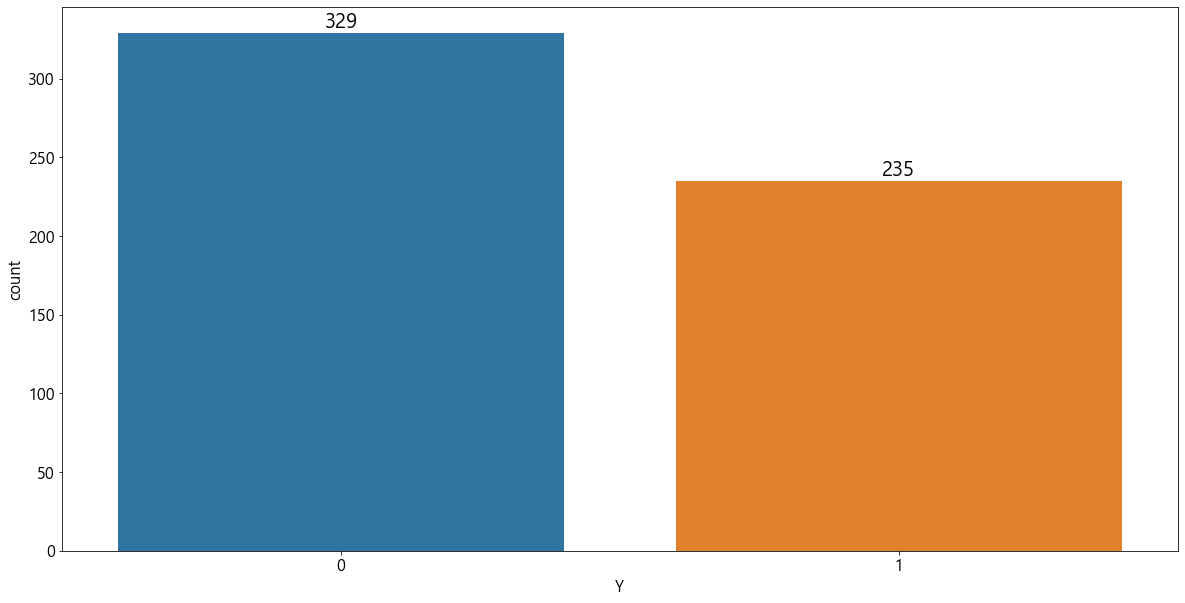

In [25]:
ax = sns.countplot(data = df_Y, x = 'Y')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 20)
plt.show()

## Next Change 값 분포

<AxesSubplot:ylabel='Count'>

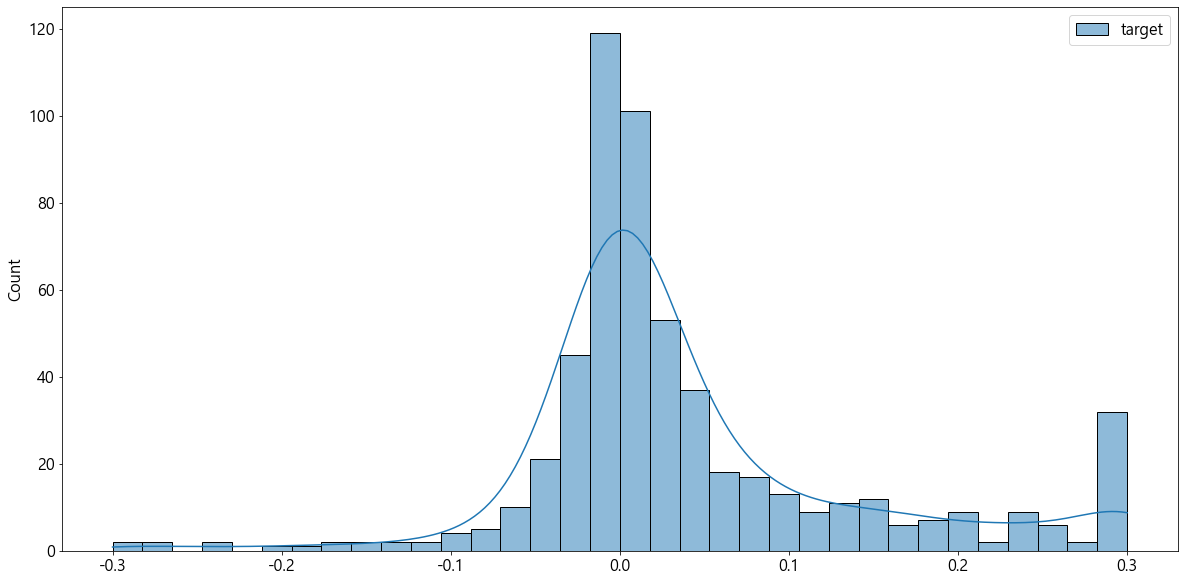

In [31]:
sns.histplot(data = df_target , kde = True)

In [33]:
# 주식 상한선 하한선 (-30%~30%) 넘어가는 주식 종목 체크
df_target[(df_target['target'] < - 0.3) | (df_target['target'] > 0.3)]

,target
61,0.300000
90,-0.300000
125,0.300000
135,0.300000
186,0.300000
189,0.300068


## 이상치 탐색

In [69]:
# 기술통계값
df.describe()

,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0,target
count,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000,564.000000,564.000000,564.000000,5.640000e+02,564.000000
mean,71098.086879,72646.072695,69794.991135,71105.457447,1.041903e+12,71362.342199,72960.643617,69997.554965,71513.671986,1.063863e+12,71640.253546,73488.539007,70393.888298,72091.991135,1.042906e+12,72150.012411,73920.742908,70828.356383,72585.735816,1.098367e+12,72544.707447,74419.037234,71292.929078,73317.294326,1.104992e+12,73063.482270,74986.515957,71692.719858,73799.184397,1.166269e+12,73715.264184,75538.230496,72236.992908,74074.476950,1.198569e+12,74118.597518,76317.709220,72623.718085,74963.031915,1.273523e+12,75398.079787,78228.258865,73530.636525,76405.758865,1.449458e+12,77203.425532,81989.553191,75165.609929,79002.581560,1.830979e+12,0.040407
std,76589.844277,78010.280421,75450.447245,76564.015106,1.383787e+12,77012.023446,78125.654850,75006.186509,76423.456125,1.344445e+12,76645.685009,78906.036366,75514.167874,77305.880855,1.136893e+12,77189.747166,78752.406364,75652.924737,76979.076964,1.605816e+12,77624.239907,79556.629891,76374.146974,78090.392157,1.517928e+12,78497.897618,80777.662053,76984.978518,79242.449940,1.617093e+12,80127.687006,81835.066986,78453.209497,79856.563429,1.712293e+12,80773.099982,82967.314392,79056.828796,80810.832589,1.815457e+12,82058.671546,85169.715867,79335.303836,82413.747296,1.833226e+12,83800.942755,90671.853565,81804.165116,87125.671728,1.709187e+12,0.100514
min,550.000000,560.000000,541.000000,544.000000,3.549257e+09,549.000000,560.000000,541.000000,546.000000,3.448088e+09,0.000000,0.000000,0.000000,709.000000,0.000000e+00,0.000000,0.000000,0.000000,745.000000,0.000000e+00,0.000000,0.000000,0.000000,693.000000,0.000000e+00,0.000000,0.000000,0.000000,693.000000,0.000000e+00,0.000000,0.000000,0.000000,699.000000,0.000000e+00,0.000000,0.000000,0.000000,715.000000,0.000000e+00,0.000000,0.000000,0.000000,826.000000,0.000000e+00,898.000000,1070.000000,892.000000,1070.000000,1.000495e+12,-0.300000
25%,38052.250000,40398.750000,37112.500000,38047.000000,1.850090e+11,38037.250000,39996.250000,37363.750000,38212.000000,2.214951e+11,38222.000000,39836.500000,37281.250000,38381.500000,2.171487e+11,38222.000000,40248.750000,37528.250000,39385.250000,2.380970e+11,38935.250000,40409.500000,37581.000000,39817.750000,2.559294e+11,39197.750000,41305.750000,38481.000000,40839.000000,2.745977e+11,39702.500000,40599.000000,38562.750000,41792.750000,3.062507e+11,41133.250000,43070.000000,39403.250000,42054.750000,3.537973e+11,41950.250000,45500.000000,40236.250000,42964.250000,5.829143e+11,42791.250000,46800.000000,41699.250000,44975.000000,1.143603e+12,-0.010376
50%,58273.500000,59250.000000,57600.000000,58323.500000,8.089915e+11,58250.000000,58950.000000,57500.000000,58550.000000,8.536831e+11,58000.000000,59100.000000,57600.000000,58550.000000,8.467174e+11,58200.000000,59181.000000,57700.000000,58650.000000,8.174319e+11,58250.000000,59350.000000,57650.000000,58800.000000,8.779020e+11,58800.000000,59400.00

min값을 살펴보면 주가와 거래대금에 0 값이 존재함을 알 수 있음.<br>
이상치 데이터 뽑아 종목 시각화 해보기

In [70]:
df[df['trading_val_D-1'] == df['trading_val_D-1'].min()]

,code,date,Open_D-9,High_D-9,Low_D-9,Close_D-9,trading_val_D-9,Open_D-8,High_D-8,Low_D-8,Close_D-8,trading_val_D-8,Open_D-7,High_D-7,Low_D-7,Close_D-7,trading_val_D-7,Open_D-6,High_D-6,Low_D-6,Close_D-6,trading_val_D-6,Open_D-5,High_D-5,Low_D-5,Close_D-5,trading_val_D-5,Open_D-4,High_D-4,Low_D-4,Close_D-4,trading_val_D-4,Open_D-3,High_D-3,Low_D-3,Close_D-3,trading_val_D-3,Open_D-2,High_D-2,Low_D-2,Close_D-2,trading_val_D-2,Open_D-1,High_D-1,Low_D-1,Close_D-1,trading_val_D-1,Open_D-0,High_D-0,Low_D-0,Close_D-0,trading_val_D-0,target
89,019170,20200722,40250,42850,39500,41150,331143926000,42100,52900,40800,48650,1062156719750,51300,60600,50100,60300,793799812800,58200,72400,55400,62500,660813687500,67300,70800,56000,62600,503703951400,61100,65200,59300,63100,289321198200,65100,75900,63600,73000,755282382000,80700,94900,78000,94900,824123747200,0,0,0,94900,0,111500,123000,95200,123000,1047121755000,0.296101
266,005930,20180504,51800,52260,51420,51620,12142056400,51000,52080,51000,51900,12060522000,51840,51860,50080,50460,15915386760,49220,50500,49220,50400,16747516800,50420,52160,50400,52140,18818942340,53380,53639,52440,53000,32129448000,0,0,0,53000,0,0,0,0,53000,0,0,0,0,53000,0,53000,53900,51800,51900,2053443792900,-0.020755


# 주식 종목 시각화 해보기
- 주가가 0인 종목 시각화 해보기
- 주가와 거래대금의 차이가 꽤 많이 나서 따로 시각화를 진행하였다.

## 삼성전자 주가 시각화
- 2018년 2월 1일 ~ 2018년 6월 30일까지 시각화
- 종가를 제외한 주가에서 모두 O으로 나타남

In [55]:
# 거래대금 제외 데이터
df_samsung[df_samsung.columns[:4]].iplot(kind = 'line')

In [57]:
df_samsung['Volume'].iplot(kind = 'line')

삼성전자는 기존의 1주를 50주로 쪼개는 액면분할을 실시하여 4.30 ~ 5.2일까지 거래정지기간으로 나타났다.<br>

## 신풍제약 주가 시각화

In [59]:
import FinanceDataReader as fdr

# 신풍제약
df_sinpung = fdr.DataReader('019170', start = '2020-07-01', end = '2020-11-30')
df_sinpung.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-01,30400,31150,29150,29250,2957350,-0.031457
2020-07-02,29300,29850,28900,29300,1429912,0.001709
2020-07-03,29300,31300,28900,29550,3505959,0.008532
2020-07-06,30100,32000,29750,31050,5148966,0.050761
2020-07-07,31400,39700,31050,37950,28716072,0.222222
2020-07-08,39000,44600,38500,39400,15686852,0.038208
2020-07-09,40250,42850,39500,41150,8047240,0.044416
2020-07-10,42100,52900,40800,48650,21832615,0.182260
2020-07-13,51300,60600,50100,60300,13164176,0.239466


In [61]:
df_sinpung[df_sinpung.columns[:4]].iplot(kind = 'line')

In [62]:
df_sinpung['Volume'].iplot(kind = 'line')

코로나 19사태로 인해 백신개발 관련 종목들이 급등하면서 6월 21일, 6월 23일 매매거래가 정지되었다.<br>
이와 같이 특수한 상황인 경우 모델이 다음 날 수익률을 예측하는데 어려움을 가질 수 있으므로 해당 데이터를 제거한다.